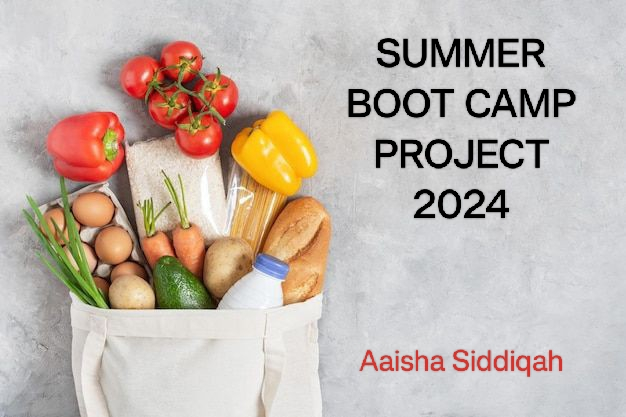

# **Wholesale Data Analysis**

# **PROBLEM STATEMNET/OBJECTIVE**

Data : A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

Data Description
1.	Buyer/Spender- ID's of customers
2.	Region- Region of the distributor
3.	Fresh- spending on Fresh Vegetables
4.	Milk- spending on milk
5.	Grocery- spending on grocery
6.	Frozen- spending on frozen food
7.	Detergents_paper- spending on detergents and toilet paper
8.	Delicatessen- spending on instant foods


In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
try:
    wholesale_df = pd.read_csv('Wholesale.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'Wholesale.csv' was not found.")
    exit()

Dataset loaded successfully.


In [7]:
# @title BASIC STEPS:
print("Top 5 rows of the dataset:")
print(wholesale_df.head())

Top 5 rows of the dataset:
   Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561   214.0   
1              2  Retail  Other   7057  9810     9568  1762.0   
2              3  Retail  Other      ?  8808     7684  2405.0   
3              4   Hotel  Other  13265  1196     4221  6404.0   
4              5  Retail  Other  22615  5410     7198  3915.0   

   Detergents_Paper  Delicatessen  
0            2674.0        1338.0  
1            3293.0        1776.0  
2            3516.0        7844.0  
3             507.0        1788.0  
4            1777.0        5185.0  


In [8]:
print("\nLast 5 rows of the dataset:")
print(wholesale_df.tail())


Last 5 rows of the dataset:
     Buyer/Spender Channel Region  Fresh   Milk  Grocery   Frozen  \
435            436   Hotel  Other  29703  12051    16027  13135.0   
436            437   Hotel  Other  39228   1431      764   4510.0   
437            438  Retail  Other  14531  15488    30243    437.0   
438            439   Hotel  Other  10290   1981     2232   1038.0   
439            440   Hotel  Other   2787   1698     2510     65.0   

     Detergents_Paper  Delicatessen  
435             182.0        2204.0  
436              93.0        2346.0  
437           14841.0        1867.0  
438             168.0        2125.0  
439             477.0          52.0  


In [9]:
# 3. Check the shape of the dataset
print("\nShape of the dataset:")
print(wholesale_df.shape)


Shape of the dataset:
(440, 9)


In [10]:
# 4. Check the datatypes of each feature
print("\nData types of each feature:")
print(wholesale_df.dtypes)


Data types of each feature:
Buyer/Spender         int64
Channel              object
Region               object
Fresh                object
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object


In [11]:
# 5. Check the statistical summary
print("\nStatistical summary of the dataset:")
print(wholesale_df.describe())


Statistical summary of the dataset:
       Buyer/Spender           Milk       Grocery        Frozen  \
count     440.000000     440.000000    440.000000    437.000000   
mean      220.500000    6035.779545   7951.277273   3085.638444   
std       127.161315    8964.929649   9503.162829   4867.744145   
min         1.000000       1.000000      3.000000     25.000000   
25%       110.750000    1525.250000   2153.000000    744.000000   
50%       220.500000    3641.000000   4755.500000   1535.000000   
75%       330.250000    7217.500000  10655.750000   3570.000000   
max       440.000000  112400.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        439.000000    438.000000  
mean        3773.747153   1531.057078  
std        19364.886053   2825.044262  
min            3.000000      3.000000  
25%          256.500000    411.250000  
50%          813.000000    971.000000  
75%         3956.000000   1822.750000  
max       396100.000000  47943.000000  

In [12]:
# 6. Check for null values
print("\nNull values in the dataset:")
print(wholesale_df.isnull().sum())


Null values in the dataset:
Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64


In [13]:
# 7. Check for duplicate values
print("\nDuplicate values in the dataset:")
print(wholesale_df.duplicated().sum())


Duplicate values in the dataset:
0


In [17]:
# 8. # Check for anomalies or wrong entries
print("\nAnomalies or wrong entries in the dataset:")
# Convert spending columns to numeric (errors='coerce' will convert non-numeric values to NaN)
wholesale_df[spending_columns] = wholesale_df[spending_columns].apply(pd.to_numeric, errors='coerce')
# Check for negative values (assuming NaN values are not considered anomalies)
anomalies = wholesale_df[spending_columns] < 0
print(anomalies.sum())


Anomalies or wrong entries in the dataset:
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64


In [18]:
# 9. Check for outliers and their authenticity
print("\nOutliers in the dataset:")
for column in spending_columns:
    q1 = wholesale_df[column].quantile(0.25)
    q3 = wholesale_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = wholesale_df[(wholesale_df[column] < lower_bound) | (wholesale_df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)


Outliers in the dataset:
Outliers in Fresh:
     Buyer/Spender Channel  Region     Fresh   Milk  Grocery   Frozen  \
29              30   Hotel   Other   43088.0   2100     2609   1200.0   
39              40     NaN   Other   56159.0    555      902  10002.0   
47              48  Retail   Other   44466.0  54259    55571   7782.0   
52              53  Retail   Other   40721.0   3916     5876    532.0   
87              88   Hotel   Other   43265.0   5025     8117   6312.0   
103            104   Hotel   Other   56082.0   3504     8906  18028.0   
125            126   Hotel   Other   76237.0   3473     7102  16538.0   
129            130   Hotel   Other   42312.0    926     1510   1718.0   
176            177   Hotel   Other   45640.0   6958     6536   7368.0   
181            182   Hotel   Other  112151.0  29627    18148  16745.0   
239            240   Hotel  Lisbon   47493.0   2567     3779   5243.0   
258            259   Hotel  Lisbon   56083.0   4563     2124   6422.0   
259   

In [19]:
# 10. Perform necessary data cleaning steps
# Drop duplicates
wholesale_df_cleaned = wholesale_df.drop_duplicates()

# Handling null values (assuming we drop rows with any null values)
wholesale_df_cleaned = wholesale_df_cleaned.dropna()

# Removing anomalies (assuming we replace negative values with NaN and then drop those rows)
wholesale_df_cleaned[spending_columns] = wholesale_df_cleaned[spending_columns].applymap(lambda x: np.nan if x < 0 else x)
wholesale_df_cleaned = wholesale_df_cleaned.dropna()

In [20]:
# Display cleaned dataset summary
print("\nCleaned dataset summary:")
print(wholesale_df_cleaned.describe())


Cleaned dataset summary:
       Buyer/Spender          Fresh           Milk       Grocery  \
count     423.000000     423.000000     423.000000    423.000000   
mean      221.721040   12113.650118    6068.687943   7940.747045   
std       126.939672   12642.275198    9072.209860   9537.083451   
min         1.000000       3.000000       1.000000      3.000000   
25%       112.500000    3119.500000    1532.000000   2156.000000   
50%       221.000000    8607.000000    3651.000000   4748.000000   
75%       332.500000   17043.000000    7196.500000  10694.500000   
max       440.000000  112151.000000  112400.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen  
count    423.000000        423.000000    423.000000  
mean    3065.988180       3778.453901   1522.801418  
std     4920.662813      19701.204009   2847.846728  
min       25.000000          3.000000      3.000000  
25%      740.500000        260.000000    410.000000  
50%     1483.000000        811.000000

In [21]:
# @title Spending Analysis
# 1. What is the total number of buyers in the dataset?
total_buyers = wholesale_df_cleaned.shape[0]
print(f"Total number of buyers: {total_buyers}")

Total number of buyers: 423


In [22]:
# 2. What is the average spending on each category?
average_spending = wholesale_df_cleaned[spending_columns].mean()
print("\nAverage spending on each category:")
print(average_spending)


Average spending on each category:
Fresh               12113.650118
Milk                 6068.687943
Grocery              7940.747045
Frozen               3065.988180
Detergents_Paper     3778.453901
Delicatessen         1522.801418
dtype: float64


In [23]:
# 3. Which category has the highest average spending?
highest_avg_spending_category = average_spending.idxmax()
print(f"\nCategory with the highest average spending: {highest_avg_spending_category}")


Category with the highest average spending: Fresh


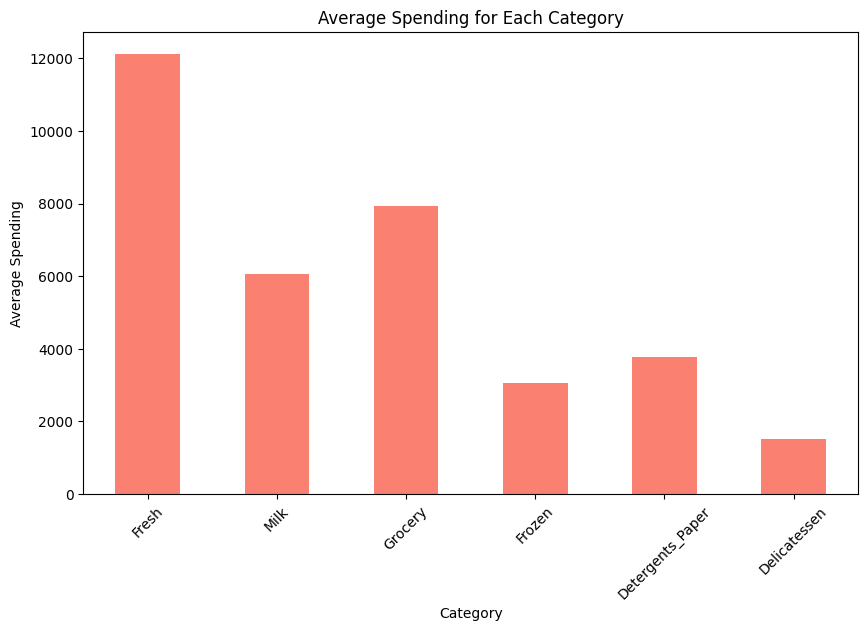

In [56]:
import matplotlib.pyplot as plt

# Calculate the average spending for each category
average_spending = wholesale_df_cleaned[spending_columns].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_spending.plot(kind='bar', color='salmon')
plt.xlabel('Category')
plt.ylabel('Average Spending')
plt.title('Average Spending for Each Category')
plt.xticks(rotation=45)
plt.show()

In [24]:
# 4. How many buyers spend above the average on Fresh Vegetables?
average_fresh_spending = average_spending['Fresh']
buyers_above_avg_fresh = wholesale_df_cleaned[wholesale_df_cleaned['Fresh'] > average_fresh_spending].shape[0]
print(f"\nNumber of buyers who spend above the average on Fresh Vegetables: {buyers_above_avg_fresh}")


Number of buyers who spend above the average on Fresh Vegetables: 155


In [25]:
# @title Regional Demand

# 1. What is the total spending in each region?
total_spending_by_region = wholesale_df_cleaned.groupby('Region')[spending_columns].sum()
print("\nTotal spending in each region:")
print(total_spending_by_region)


Total spending in each region:
            Fresh     Milk  Grocery    Frozen  Detergents_Paper  Delicatessen
Region                                                                       
Lisbon   845508.0   397328   534652  222550.0          577447.0       98496.0
Oporto   432343.0   232764   418529  173172.0          172339.0       50668.0
Other   3846223.0  1936963  2405755  901191.0          848500.0      494981.0


<Figure size 1200x600 with 0 Axes>

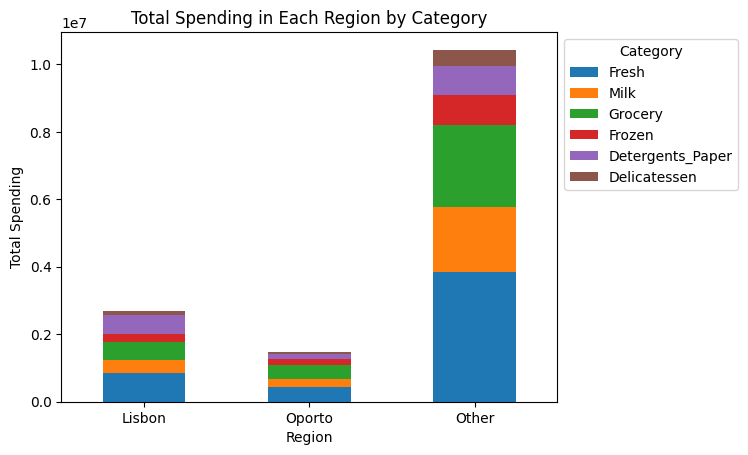

In [55]:
import matplotlib.pyplot as plt

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
total_spending_by_region.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.title('Total Spending in Each Region by Category')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

In [26]:
# 2. Which region has the highest spending on Milk?
region_highest_milk_spending = total_spending_by_region['Milk'].idxmax()
print(f"\nRegion with the highest spending on Milk: {region_highest_milk_spending}")


Region with the highest spending on Milk: Other


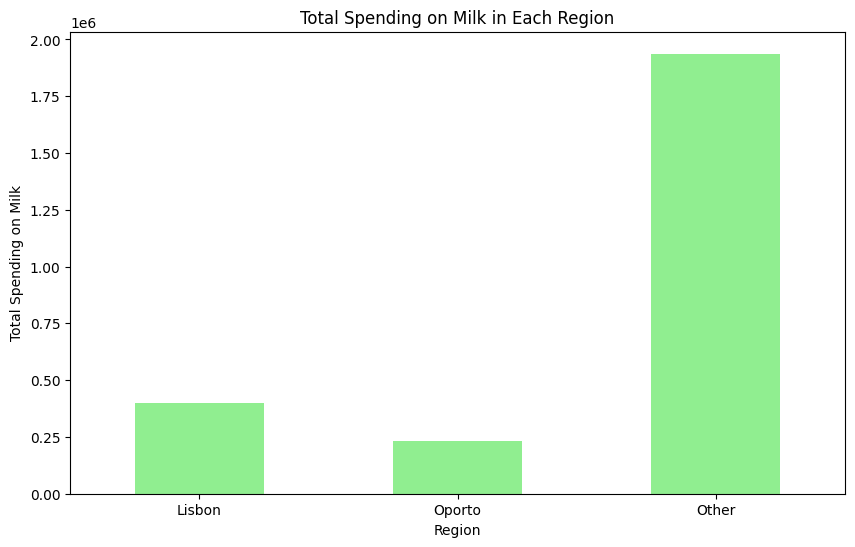

In [54]:
import matplotlib.pyplot as plt

# Calculate the total spending on Milk for each region
total_spending_milk_by_region = wholesale_df_cleaned.groupby('Region')['Milk'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
total_spending_milk_by_region.plot(kind='bar', color='lightgreen')
plt.xlabel('Region')
plt.ylabel('Total Spending on Milk')
plt.title('Total Spending on Milk in Each Region')
plt.xticks(rotation=0)
plt.show()

In [27]:
# 3. How does the average spending on Grocery vary across different regions?
average_spending_grocery_by_region = wholesale_df_cleaned.groupby('Region')['Grocery'].mean()
print("\nAverage spending on Grocery across different regions:")
print(average_spending_grocery_by_region)


Average spending on Grocery across different regions:
Region
Lisbon    7128.693333
Oporto    9733.232558
Other     7887.721311
Name: Grocery, dtype: float64


In [28]:
# 4. Which region has the highest average spending per buyer?
average_spending_per_buyer_by_region = wholesale_df_cleaned.groupby('Region')[spending_columns].mean().sum(axis=1)
region_highest_avg_spending_per_buyer = average_spending_per_buyer_by_region.idxmax()
print(f"\nRegion with the highest average spending per buyer: {region_highest_avg_spending_per_buyer}")


Region with the highest average spending per buyer: Lisbon


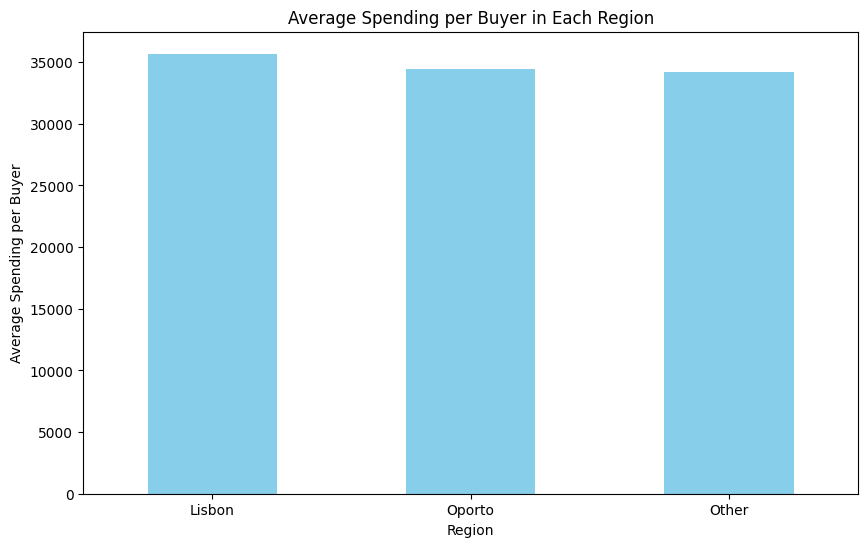

In [53]:
import matplotlib.pyplot as plt

# Calculate the average spending per buyer for each region
average_spending_per_buyer_by_region = wholesale_df_cleaned.groupby('Region')[spending_columns].mean().sum(axis=1)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_spending_per_buyer_by_region.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Spending per Buyer')
plt.title('Average Spending per Buyer in Each Region')
plt.xticks(rotation=0)
plt.show()

In [29]:
# @title Category Preferences

# 1. What percentage of buyers spend more on Frozen food compared to Delicatessen?
buyers_more_frozen_than_delicatessen = (wholesale_df_cleaned['Frozen'] > wholesale_df_cleaned['Delicatessen']).sum()
total_buyers = wholesale_df_cleaned.shape[0]
percentage_more_frozen = (buyers_more_frozen_than_delicatessen / total_buyers) * 100
print(f"\nPercentage of buyers spending more on Frozen food compared to Delicatessen: {percentage_more_frozen:.2f}%")


Percentage of buyers spending more on Frozen food compared to Delicatessen: 64.54%


In [30]:
# 2. Which category shows the most variation in spending among buyers?
variation_in_spending = wholesale_df_cleaned[spending_columns].std()
category_most_variation = variation_in_spending.idxmax()
print(f"\nCategory showing the most variation in spending among buyers: {category_most_variation}")


Category showing the most variation in spending among buyers: Detergents_Paper


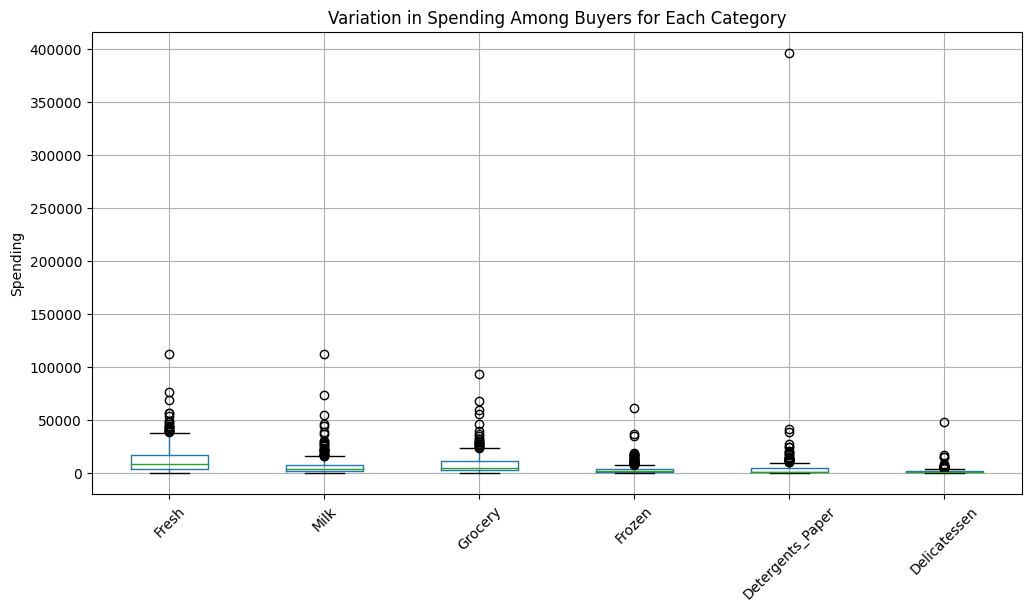

In [52]:
import matplotlib.pyplot as plt

# Creating a box plot to show the variation in spending for each category
plt.figure(figsize=(12, 6))
wholesale_df_cleaned[spending_columns].boxplot()
plt.ylabel('Spending')
plt.title('Variation in Spending Among Buyers for Each Category')
plt.xticks(rotation=45)
plt.show()


In [31]:
# 3. Are there any regions where spending on Detergents_Paper is significantly higher than others?
mean_spending_detergents_paper = wholesale_df_cleaned['Detergents_Paper'].mean()
std_spending_detergents_paper = wholesale_df_cleaned['Detergents_Paper'].std()
threshold = mean_spending_detergents_paper + 2 * std_spending_detergents_paper
regions_higher_spending_detergents_paper = wholesale_df_cleaned[wholesale_df_cleaned['Detergents_Paper'] > threshold]['Region'].unique()
print("\nRegions where spending on Detergents_Paper is significantly higher than others:")
print(regions_higher_spending_detergents_paper)


Regions where spending on Detergents_Paper is significantly higher than others:
['Lisbon']


In [32]:
# 4. What is the correlation between spending on Fresh and Frozen food?
correlation_fresh_frozen = wholesale_df_cleaned['Fresh'].corr(wholesale_df_cleaned['Frozen'])
print(f"\nCorrelation between spending on Fresh and Frozen food: {correlation_fresh_frozen:.2f}")


Correlation between spending on Fresh and Frozen food: 0.34


In [34]:
# @title Customer Segmentation

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Can buyers be grouped into segments based on their spending patterns?
# Using KMeans clustering with 5 clusters (can be adjusted)
kmeans = KMeans(n_clusters=5, random_state=0).fit(wholesale_df_cleaned[spending_columns])
wholesale_df_cleaned['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


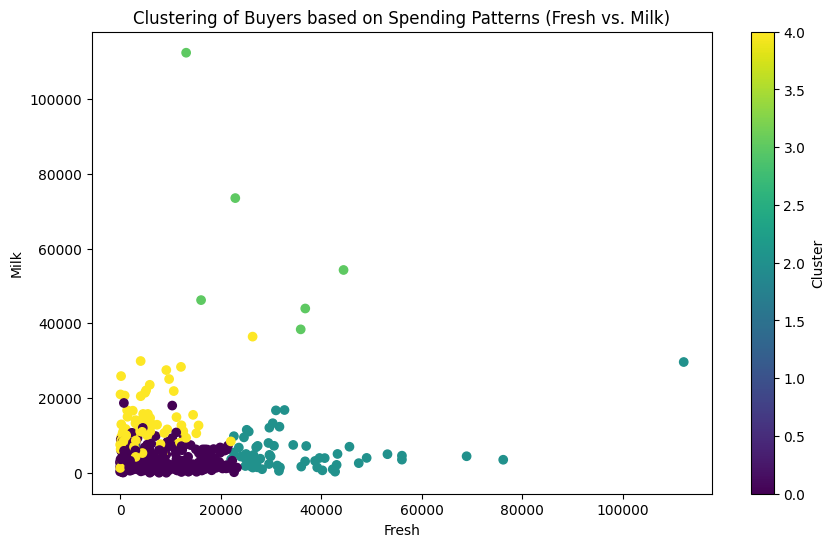

In [35]:
# Visualizing the clusters (using only two dimensions for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(wholesale_df_cleaned['Fresh'], wholesale_df_cleaned['Milk'], c=wholesale_df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Clustering of Buyers based on Spending Patterns (Fresh vs. Milk)')
plt.colorbar(label='Cluster')
plt.show()


In [36]:
# 2. What are the characteristics of the top 10% spenders in each category?
top_10_percent_spending = wholesale_df_cleaned[spending_columns].quantile(0.90)
print("\nCharacteristics of the top 10% spenders in each category:")
print(top_10_percent_spending)


Characteristics of the top 10% spenders in each category:
Fresh               27150.0
Milk                12586.2
Grocery             18841.4
Frozen               7523.2
Detergents_Paper     7531.4
Delicatessen         2941.4
Name: 0.9, dtype: float64


In [50]:
# 3. How do spending patterns differ between high spenders and low spenders?
# Assuming high spenders are in the top 10% and low spenders are in the bottom 50%
high_spenders = wholesale_df_cleaned[wholesale_df_cleaned[spending_columns] > top_10_percent_spending]
low_spenders = wholesale_df_cleaned[wholesale_df_cleaned[spending_columns] <= top_10_percent_spending]

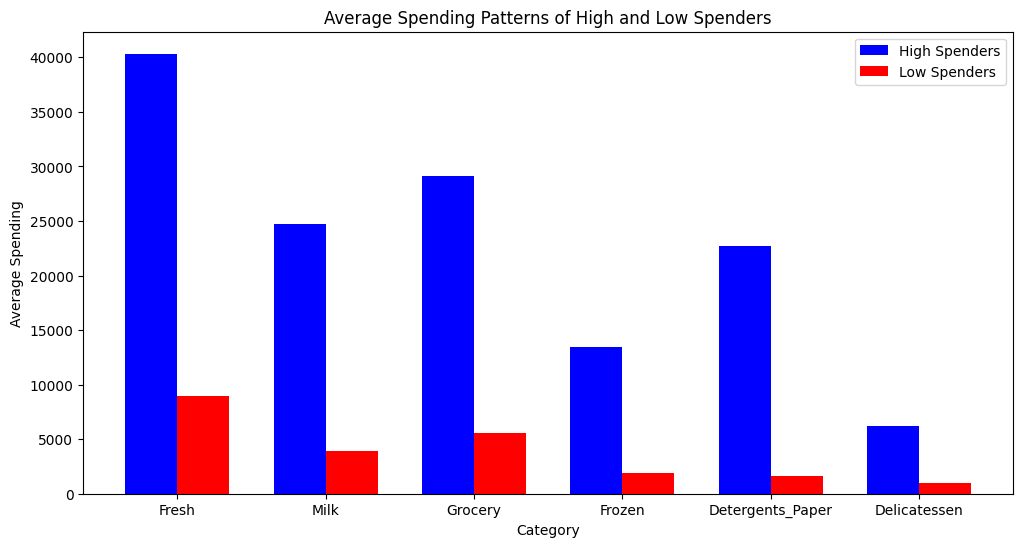

In [51]:
import matplotlib.pyplot as plt

# Calculate the average spending for high spenders (top 10%) and low spenders (bottom 50%)
average_spending_high_spenders = high_spenders[spending_columns].mean()
average_spending_low_spenders = low_spenders[spending_columns].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(spending_columns))
plt.bar(index, average_spending_high_spenders, bar_width, label='High Spenders', color='b')
plt.bar([i + bar_width for i in index], average_spending_low_spenders, bar_width, label='Low Spenders', color='r')
plt.xlabel('Category')
plt.ylabel('Average Spending')
plt.title('Average Spending Patterns of High and Low Spenders')
plt.xticks([i + bar_width/2 for i in index], spending_columns)
plt.legend()
plt.show()


In [38]:
# Displaying the difference in spending patterns
spending_difference = high_spenders[spending_columns].mean() - low_spenders[spending_columns].mean()
print("\nDifference in spending patterns between high spenders and low spenders:")
print(spending_difference)


Difference in spending patterns between high spenders and low spenders:
Fresh               31413.990024
Milk                20741.455998
Grocery             23621.103794
Frozen              11604.373562
Detergents_Paper    21068.803733
Delicatessen         5181.479192
dtype: float64


In [39]:
# @title Cross-Category Analysis

# 1. Is there a correlation between spending on Milk and Grocery?
correlation_milk_grocery = wholesale_df_cleaned['Milk'].corr(wholesale_df_cleaned['Grocery'])
print(f"\nCorrelation between spending on Milk and Grocery: {correlation_milk_grocery:.2f}")


Correlation between spending on Milk and Grocery: 0.59


In [40]:
# 2. Do buyers who spend more on Delicatessen also spend more on Frozen food?
correlation_delicatessen_frozen = wholesale_df_cleaned['Delicatessen'].corr(wholesale_df_cleaned['Frozen'])
print(f"\nCorrelation between spending on Delicatessen and Frozen food: {correlation_delicatessen_frozen:.2f}")


Correlation between spending on Delicatessen and Frozen food: 0.39


In [41]:
# 3. What is the combined average spending on Fresh and Milk for each region?
average_spending_fresh_milk_by_region = wholesale_df_cleaned.groupby('Region')[['Fresh', 'Milk']].mean()
print("\nCombined average spending on Fresh and Milk for each region:")
print(average_spending_fresh_milk_by_region)


Combined average spending on Fresh and Milk for each region:
               Fresh         Milk
Region                           
Lisbon  11273.440000  5297.706667
Oporto  10054.488372  5413.116279
Other   12610.567213  6350.698361


In [42]:
# @title Demand Trends

# 1. Which region has the fastest-growing spending on Fresh Vegetables?
# Assuming 'Region' is the column indicating the region and 'Fresh' is the spending on Fresh Vegetables
average_spending_fresh_by_region = wholesale_df_cleaned.groupby('Region')['Fresh'].mean()
growth_rate_fresh_vegetables = average_spending_fresh_by_region.pct_change().dropna()
region_fastest_growing_fresh = growth_rate_fresh_vegetables.idxmax()
print(f"\nRegion with the fastest-growing spending on Fresh Vegetables: {region_fastest_growing_fresh}")


Region with the fastest-growing spending on Fresh Vegetables: Other


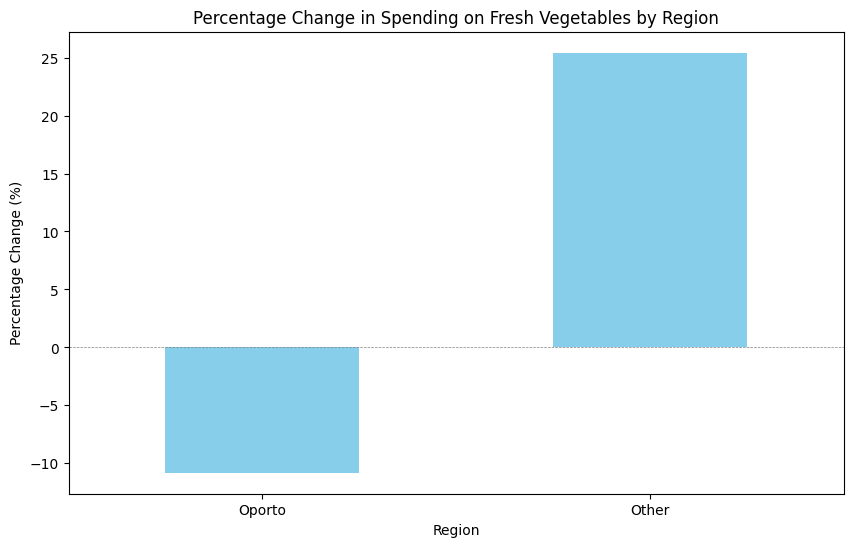

In [49]:
import matplotlib.pyplot as plt

# Calculate the average spending on Fresh Vegetables by region
average_spending_fresh_by_region = wholesale_df_cleaned.groupby('Region')['Fresh'].mean()

# Calculate the percentage change in spending on Fresh Vegetables
growth_rate_fresh_vegetables = average_spending_fresh_by_region.pct_change().dropna() * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
growth_rate_fresh_vegetables.plot(kind='bar', color='skyblue')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
plt.xlabel('Region')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Spending on Fresh Vegetables by Region')
plt.xticks(rotation=0)
plt.show()


In [43]:
# 2. How does the total spending on Grocery change across regions over time (if time data is available)?
# Since we don't have time data, we can't analyze changes over time. However, we can calculate the total spending on Grocery for each region.
total_spending_grocery_by_region = wholesale_df_cleaned.groupby('Region')['Grocery'].sum()
print("\nTotal spending on Grocery across regions:")
print(total_spending_grocery_by_region)


Total spending on Grocery across regions:
Region
Lisbon     534652
Oporto     418529
Other     2405755
Name: Grocery, dtype: int64


In [44]:
# 3. What is the average spending per buyer in each category over a specified time period (if time data is available)?
# Since we don't have time data, we can calculate the average spending per buyer in each category.
average_spending_per_buyer_by_category = wholesale_df_cleaned[spending_columns].mean()
print("\nAverage spending per buyer in each category:")
print(average_spending_per_buyer_by_category)


Average spending per buyer in each category:
Fresh               12113.650118
Milk                 6068.687943
Grocery              7940.747045
Frozen               3065.988180
Detergents_Paper     3778.453901
Delicatessen         1522.801418
dtype: float64


In [45]:
# @title Buyer Insights

# 1. What is the repeat purchase rate for buyers who spend above the average in at least three categories?
# Assuming 'Region' is the column indicating the region and 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen' are the spending columns
# Calculate the number of categories where each buyer spends above the average
above_average_count = (wholesale_df_cleaned[spending_columns] > wholesale_df_cleaned[spending_columns].mean()).sum(axis=1)
# Calculate the repeat purchase rate for buyers who spend above the average in at least three categories
repeat_purchase_rate = (above_average_count >= 3).mean()
print(f"\nRepeat purchase rate for buyers who spend above the average in at least three categories: {repeat_purchase_rate:.2f}")


Repeat purchase rate for buyers who spend above the average in at least three categories: 0.36


In [46]:
# 2. How many buyers spend consistently (i.e., similar amounts) across all categories?
# Calculate the coefficient of variation for each buyer to measure consistency
coefficient_variation = wholesale_df_cleaned[spending_columns].std(axis=1) / wholesale_df_cleaned[spending_columns].mean(axis=1)
# Define a threshold for consistency (e.g., coefficient of variation < 0.1)
consistent_buyers_count = (coefficient_variation < 0.1).sum()
print(f"\nNumber of buyers who spend consistently across all categories: {consistent_buyers_count}")



Number of buyers who spend consistently across all categories: 0


In [47]:
# 3. Which region has the most diverse spending patterns (i.e., high variance in spending across categories)?
# Calculate the variance of spending in each region to measure diversity
variance_by_region = wholesale_df_cleaned.groupby('Region')[spending_columns].var().sum(axis=1)
most_diverse_region = variance_by_region.idxmax()
print(f"\nRegion with the most diverse spending patterns: {most_diverse_region}")


Region with the most diverse spending patterns: Lisbon


<Figure size 1200x600 with 0 Axes>

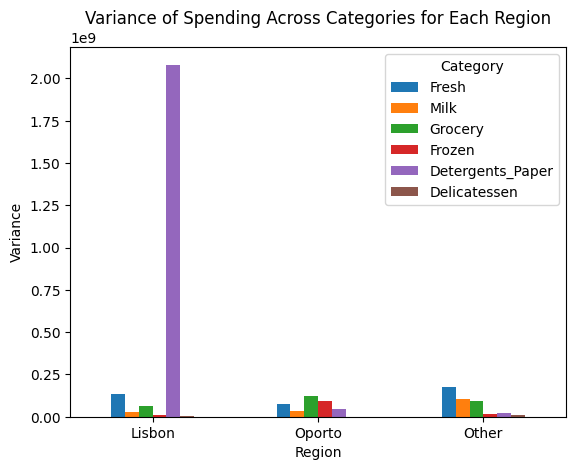

In [48]:
import matplotlib.pyplot as plt

# Calculate the variance of spending in each category for each region
variance_by_category = wholesale_df_cleaned.groupby('Region')[spending_columns].var()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
variance_by_category.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Variance')
plt.title('Variance of Spending Across Categories for Each Region')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()